In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
 
warnings.filterwarnings("ignore")

# New Section

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
pip install ta

  Created wheel for ta: filename=ta-0.5.25-cp36-none-any.whl size=24880 sha256=5a9fba53afaf10a7a866a9de56c6a64c148ada9edb1c7077f61becc00852f012
  Stored in directory: /root/.cache/pip/wheels/2e/93/b7/cf649194508e53cee4145ffb949e9f26877a5a8dd12db9ed5b
Successfully built ta


In [ ]:
downloaded = drive.CreateFile({'id':'115XZiceVGxTuDCbT_QAZHQmyrEnfu72p'}) # replace the id with id of file you want to access
downloaded.GetContentFile('GSPC .csv')

In [ ]:
df = pd.read_csv('GSPC .csv', index_col=0, parse_dates=True)
# data = df.copy()
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,1132.989990,3991400000
2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000
2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000
2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000
2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000


In [ ]:
# Calculating desicions
df['Trend'] = 0
for i in range(df.shape[0]-1):
  if i == 0:
    pass
  else:
    if df['Close'][i+1]>df['Close'][i]:
      df['Trend'][i+1] = 1
    # elif df['Close'][i+1]<df['Close'][i]:
    #   df['Decision'][i+1] = -1
    else:
      df['Trend'][i+1] = 0

In [ ]:
print('UP: {}'.format(df[df['Trend']==1].shape))
print('DOWN: {}'.format(df[df['Trend']==0].shape))
# print('Sell: {}'.format(df[df['Decision']==-1].shape))

UP: (1400, 7)
DOWN: (1158, 7)


In [ ]:
# RSI
# def computeRSI (data, time_window):
#     diff = data.diff(1).dropna()        # diff in one field(one day)

#     #this preservers dimensions off diff values
#     up_chg = 0 * diff
#     down_chg = 0 * diff
    
#     # up change is equal to the positive difference, otherwise equal to zero
#     up_chg[diff > 0] = diff[ diff>0 ]
    
#     # down change is equal to negative deifference, otherwise equal to zero
#     down_chg[diff < 0] = diff[ diff < 0 ]
    
    # check pandas documentation for ewm
    # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html
    # values are related to exponential decay
    # we set com=time_window-1 so we get decay alpha=1/time_window
#     up_chg_avg   = up_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
#     down_chg_avg = down_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    
#     rs = abs(up_chg_avg/down_chg_avg)
#     rsi = 100 - 100/(1+rs)
#     return rsi

# df['RSI'] = computeRSI(df['Close'], 14)

In [ ]:
import ta
 
# Momentum indicators
###Awesome indicator
AO = ta.momentum.AwesomeOscillatorIndicator(df['High'],df['Low'])
df['momentum_rsi'] = AO.ao()
 
##KAMA indicator
KAMA = ta.momentum.KAMAIndicator(df['Close'])
df['KAMA'] = KAMA.kama()
 
ROC = ta.momentum.ROCIndicator(df['Close'])
df['ROC'] = ROC.roc()
 
RSI = ta.momentum.RSIIndicator(df['Close'])
df['RSI'] = RSI.rsi()
 
StochOscil = ta.momentum.StochasticOscillator(df['High'], df['Low'], df['Close'])
df['StochOscil'] = StochOscil.stoch()
df['StochSignal'] = StochOscil.stoch_signal()
 
df['TSI'] = ta.momentum.tsi(df['Close'])
 
df['UO'] = ta.momentum.uo(df['High'], df['Low'], df['Close'])
 
df['WPR'] = ta.momentum.wr(df['High'], df['Low'], df['Close'])

In [ ]:
# Volume indicators
 
df['ADI'] = ta.volume.acc_dist_index(df['High'], df['Low'], df['Close'], df['Volume'])
 
df['CMF'] = ta.volume.chaikin_money_flow(df['High'], df['Low'], df['Close'], df['Volume'])
 
df['EMV'] = ta.volume.ease_of_movement(df['High'], df['Low'], df['Volume'])
 
df['FI'] = ta.volume.force_index(df['Close'], df['Volume'])
 
df['MFI'] = ta.volume.money_flow_index(df['High'], df['Low'], df['Close'], df['Volume'])
 
df['NVI'] = ta.volume.negative_volume_index(df['Close'], df['Volume'])
 
df['OBV'] = ta.volume.on_balance_volume(df['Close'], df['Volume'])

In [ ]:
# Trend indicators
df['ADX'] = ta.trend.adx(df['High'], df['Low'], df['Close'])
 
df['ADX_NEG'] = ta.trend.adx_neg(df['High'], df['Low'], df['Close'])
 
df['ADX_POS'] = ta.trend.adx_pos(df['High'], df['Low'], df['Close'])
 
df['AROON_D'] = ta.trend.aroon_down(df['Close'])
 
df['AROON_U'] = ta.trend.aroon_up(df['Close'])
 
df['CCI'] = ta.trend.cci(df['High'], df['Low'], df['Close'])
 
df['DPO'] = ta.trend.dpo(df['Close'])
 
df['EMA'] = ta.trend.ema_indicator(df['Close'])
 
df['ICHIMOKU_A'] = ta.trend.ichimoku_a(df['High'], df['Low'])
 
df['ICHIMOKU_B'] = ta.trend.ichimoku_b(df['High'], df['Low'])
 
df['ICHIMOKU_BL'] = ta.trend.ichimoku_base_line(df['High'], df['Low'])
 
df['ICHIMOKU_CL'] = ta.trend.ichimoku_conversion_line(df['High'], df['Low'])
 
df['KST'] = ta.trend.kst(df['Close'])
 
df['KST_SIG'] = ta.trend.kst_sig(df['Close'])
 
df['MACD'] = ta.trend.macd(df['Close'])
 
df['MACD_DIFF'] = ta.trend.macd_diff(df['Close'])
 
df['MACD_SIG'] = ta.trend.macd_signal(df['Close'])
 
df['MI'] = ta.trend.mass_index(df['High'], df['Low'])
 
df['TRIX'] = ta.trend.trix(df['Close'])
 
df['VI_NEG'] = ta.trend.vortex_indicator_neg(df['High'], df['Low'], df['Close'])
 
df['VI_POS'] = ta.trend.vortex_indicator_pos(df['High'], df['Low'], df['Close'])

In [ ]:
df.shape

(2558, 44)

In [ ]:
# Volatility indicators
 
df['BB_H'] = ta.volatility.bollinger_hband(df['Close'])
 
df['BB_HI'] = ta.volatility.bollinger_hband_indicator(df['Close'])
 
df['BB_L'] = ta.volatility.bollinger_lband(df['Close'])
 
df['BB_LI'] = ta.volatility.bollinger_lband_indicator(df['Close'])
 
df['BB_M'] = ta.volatility.bollinger_mavg(df['Close'])

In [ ]:
df.isnull().sum()

Open             0
High             0
Low              0
Close            0
Adj Close        0
Volume           0
Trend            0
momentum_rsi    33
KAMA             9
ROC             12
RSI             13
StochOscil      13
StochSignal     15
TSI             37
UO              28
WPR             13
ADI              0
CMF             19
EMV              1
FI              13
MFI             13
NVI              0
OBV              0
ADX              0
ADX_NEG          0
ADX_POS          0
AROON_D         24
AROON_U         24
CCI             19
DPO             19
EMA             11
ICHIMOKU_A      25
ICHIMOKU_B       0
ICHIMOKU_BL     25
ICHIMOKU_CL      8
KST             14
KST_SIG         14
MACD            25
MACD_DIFF       33
MACD_SIG        33
MI              40
TRIX            43
VI_NEG          14
VI_POS          14
BB_H            19
BB_HI            0
BB_L            19
BB_LI            0
BB_M            19
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Trend,momentum_rsi,KAMA,ROC,RSI,StochOscil,StochSignal,TSI,UO,WPR,ADI,CMF,EMV,FI,MFI,NVI,OBV,ADX,ADX_NEG,ADX_POS,AROON_D,AROON_U,CCI,DPO,EMA,ICHIMOKU_A,ICHIMOKU_B,ICHIMOKU_BL,ICHIMOKU_CL,KST,KST_SIG,MACD,MACD_DIFF,MACD_SIG,MI,TRIX,VI_NEG,VI_POS,BB_H,BB_HI,BB_L,BB_LI,BB_M
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-03-08,1138.400024,1141.050049,1136.770020,1138.500000,1138.500000,3774680000,0,27.371180,1114.052856,2.868760,66.070269,95.366077,96.658959,15.509659,68.728634,-4.633923,3.617629e+10,0.304013,0.755167,1.467130e+10,84.285602,1047.604016,34807370000,22.460586,19.065835,31.083442,24.0,96.0,150.178656,7.773547,1117.047396,1103.155029,1097.474976,1092.775024,1113.535034,-1.059844,-61.639243,7.625399,5.647696,1.977703,23.610585,0.050357,0.675912,1.343697,1145.051886,0.0,1057.741108,0.0,1101.396497
2010-03-09,1137.560059,1145.369995,1134.900024,1140.449951,1140.449951,5185570000,1,31.488684,1123.793526,2.820118,66.783711,91.710116,95.315824,18.133425,66.494291,-8.289884,3.648826e+10,0.350907,0.247330,1.401991e+10,84.586746,1047.604016,39992940000,22.834305,17.941249,31.683720,20.0,100.0,144.487958,2.428015,1120.647789,1105.315002,1097.474976,1094.934998,1115.695007,15.182726,-46.324548,8.927425,5.559778,3.367647,23.391081,0.065825,0.691514,1.220291,1147.318228,0.0,1063.845762,0.0,1105.581995
2010-03-10,1140.219971,1148.260010,1140.089966,1145.609985,1145.609985,5469120000,1,35.937713,1131.655482,3.393469,68.661595,95.742247,94.272814,20.919401,63.350570,-4.257753,3.840947e+10,0.366837,0.603512,1.604862e+10,85.045880,1047.604016,45462060000,23.357589,17.093939,31.857968,16.0,100.0,144.297553,-14.736517,1124.488127,1109.645020,1097.474976,1096.380005,1122.910034,19.865507,-32.157227,10.257420,5.511819,4.745602,23.202491,0.081639,0.714912,1.240231,1151.290131,0.0,1067.382855,0.0,1109.336493
2010-03-11,1143.959961,1150.239990,1138.989990,1150.239990,1150.239990,4669060000,1,40.339209,1139.790645,5.083137,70.284929,100.000000,95.817454,23.769997,70.117232,-0.000000,4.307853e+10,0.408718,0.106018,1.684421e+10,85.264479,1051.837928,50131120000,23.966017,15.975151,30.924781,12.0,100.0,134.251817,-8.202002,1128.449952,1112.584991,1097.474976,1097.369995,1127.799988,24.788652,-19.163726,11.551891,5.445032,6.106860,23.163426,0.097649,0.728866,1.211377,1154.523758,0.0,1072.360226,0.0,1113.441992
2010-03-12,1151.709961,1153.410034,1146.969971,1149.989990,1149.989990,4928160000,0,42.534416,1144.166262,4.048894,70.073857,94.924999,96.889082,26.105848,72.424693,-5.075001,4.277241e+10,0.359358,0.728536,1.426189e+10,85.572716,1051.837928,45202960000,24.728680,15.355576,31.634484,8.0,96.0,131.096970,-14.078052,1131.763804,1116.957519,1098.955017,1098.955017,1134.960022,28.619729,-7.548487,12.414489,5.046104,7.368385,22.906325,0.112845,0.705961,1.234763,1157.750083,0.0,1076.285903,0.0,1117.017993


In [ ]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Trend',
       'momentum_rsi', 'KAMA', 'ROC', 'RSI', 'StochOscil', 'StochSignal',
       'TSI', 'UO', 'WPR', 'ADI', 'CMF', 'EMV', 'FI', 'MFI', 'NVI', 'OBV',
       'ADX', 'ADX_NEG', 'ADX_POS', 'AROON_D', 'AROON_U', 'CCI', 'DPO', 'EMA',
       'ICHIMOKU_A', 'ICHIMOKU_B', 'ICHIMOKU_BL', 'ICHIMOKU_CL', 'KST',
       'KST_SIG', 'MACD', 'MACD_DIFF', 'MACD_SIG', 'MI', 'TRIX', 'VI_NEG',
       'VI_POS', 'BB_H', 'BB_HI', 'BB_L', 'BB_LI', 'BB_M'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report

In [ ]:
X = df[['Open', 'High', 'Low', 'Close', 'Volume','RSI','MACD_DIFF','ADX','StochOscil','StochSignal']].values

y = df['Trend'].values

In [ ]:
minmaxscaler = MinMaxScaler()
scaled_data = minmaxscaler.fit_transform(X)

X_train, X_test,y_train, y_test = train_test_split(scaled_data, y, test_size=0.3, random_state=21)

In [ ]:
print('Training data shape: {}'.format(X_train.shape))
print('Testing data shape: {}'.format(X_test.shape))

Training data shape: (1760, 10)
Testing data shape: (755, 10)


In [ ]:
logistic = LogisticRegression(multi_class='ovr')
logistic.fit(X_train, y_train)
score = logistic.score(X_test, y_test)
print('Accuracy of Logit model: {}'.format(score))

Accuracy of Logit model: 0.833112582781457


In [ ]:
predictions = logistic.predict(X_test)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.87      0.74      0.80       337
           1       0.81      0.91      0.86       418

    accuracy                           0.83       755
   macro avg       0.84      0.82      0.83       755
weighted avg       0.84      0.83      0.83       755



In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, predictions)
cnf_matrix

array([[250,  87],
       [ 39, 379]])

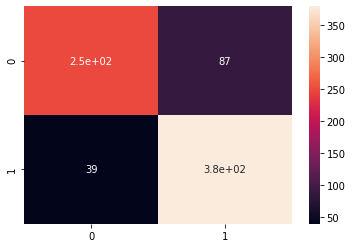

In [ ]:

import seaborn as sns
sns.heatmap(cnf_matrix, annot=True)

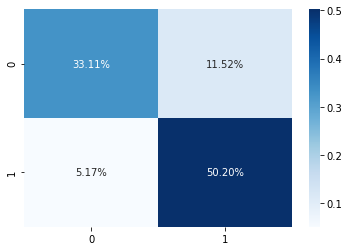

In [ ]:
sns.heatmap(cnf_matrix/np.sum(cnf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

In [ ]:
#Support Vector Classifier
svc_model=SVC(kernel='poly')
svc_model.fit(X_train,y_train)
score_svc = svc_model.score(X_test, y_test)
print('Accuracy of SVC: {}'.format(score_svc))

Accuracy of SVC: 0.8423841059602649


In [ ]:
# Random Forest Classifier
RDF_mod=RandomForestClassifier(n_estimators=100)
RDF_mod.fit(X_train,y_train)
score_rdf=RDF_mod.score(X_test,y_test)
print('Accuracy of RandomForest: {}'.format(score_rdf))

Accuracy of RandomForest: 0.8066225165562914


In [ ]:
# Gradient Boosting Classifier
GDB_model=GradientBoostingClassifier(learning_rate=0.1)
GDB_model.fit(X_train,y_train)
score_gdb=GDB_model.score(X_test,y_test)
print('Accuracy of Gradient Boosting Classifier: {}'.format(score_gdb))

Accuracy of Gradient Boosting Classifier: 0.8251655629139073


In [ ]:
# AdaBoost
ADB_model=AdaBoostClassifier(n_estimators=100)
ADB_model.fit(X_train,y_train)
score_adb=ADB_model.score(X_test,y_test)
print('Accuracy of Ada boost classifier: {}'.format(score_adb))

Accuracy of Ada boost classifier: 0.8026490066225166


In [ ]:
#LGBM
LGM_model=LGBMClassifier()
LGM_model.fit(X_train,y_train)
score_lgm=LGM_model.score(X_test,y_test)
print('Accuracy of LGBM classifier: {}'.format(score_lgm))

Accuracy of LGBM classifier: 0.8105960264900662
